# Display utility for 2D FTICR Spectra

*This little utility allows to interactively explore large 2D FTICR-MS datasets.*

You find here a simple interface the reads and displays the multiresolution 2D files created by `SPIKE` when processing 2D data-sets (usually called `xxx_mr.msh5`).

It is based on the capabilities of both the `SPIKE` library and the `jupyter notebook` interface.
Thanks to the technology behind, these extremely large files can be accessed rapidly, even on a laptop computer.

This program supersedes the old `Visu2D` program, developped in `Qt`, which could no longer be maintained.

*This is a work inprogress - additional utilities should come soon !*

## To use it, 
execute each executable cell (marked with the `In[]`) either by cliking on the Run icon on the top of the window, or by hitting *shift-Return* on the keyboard

### Initialization of the environment
the following cell should be run only once, at the beginning of the processing

In [13]:
%matplotlib notebook
from spike.Interactive.INTER import FileChooser
from spike.Interactive.FTICR_INTER import MR, MR_interact

### Choose the file
Use `FileChooser()` to choose a file on your disk - The optional `base` argument, starts the exploration on a given location.

2D processed files are `*.msh5` files.

In [14]:
FC = FileChooser('/DATA',filetype='*.msh5', mode='r')

the `MR` tool simply loads and describe the content of the file

In [15]:
MR(FC.file)

2D data-set
Axis F1 :FT-ICR report axis at 500.000000 kHz,  4096 real points,  from physical mz =  328.209   to m/z = 3000.000  R max (M=400) = 3773
Axis F2: FT-ICR report axis at 1250.000000 kHz,  262144 real points,  from physical mz =  147.411   to m/z = 3000.000  R max (M=400) = 96608
data-set is real
multiresolution data:
#: Size
1: 4096 x 262144 : 1024 Mpix
2: 1024 x 65536 : 64 Mpix
3: 1024 x 16384 : 16 Mpix
4: 1024 x 4096 : 4 Mpix
5: 1024 x 1024 : 1 Mpix


`MR_interact` loads and display the data-set.

It can be called directly

2D data-set
Axis F1 :FT-ICR report axis at 500.000000 kHz,  4096 real points,  from physical mz =  328.209   to m/z = 3000.000  R max (M=400) = 3773
Axis F2: FT-ICR report axis at 1250.000000 kHz,  262144 real points,  from physical mz =  147.411   to m/z = 3000.000  R max (M=400) = 96608
data-set is real
multiresolution data:
#: Size
1: 4096 x 262144 : 1024 Mpix
2: 1024 x 65536 : 64 Mpix
3: 1024 x 16384 : 16 Mpix
4: 1024 x 4096 : 4 Mpix
5: 1024 x 1024 : 1 Mpix


<IPython.core.display.Javascript object>


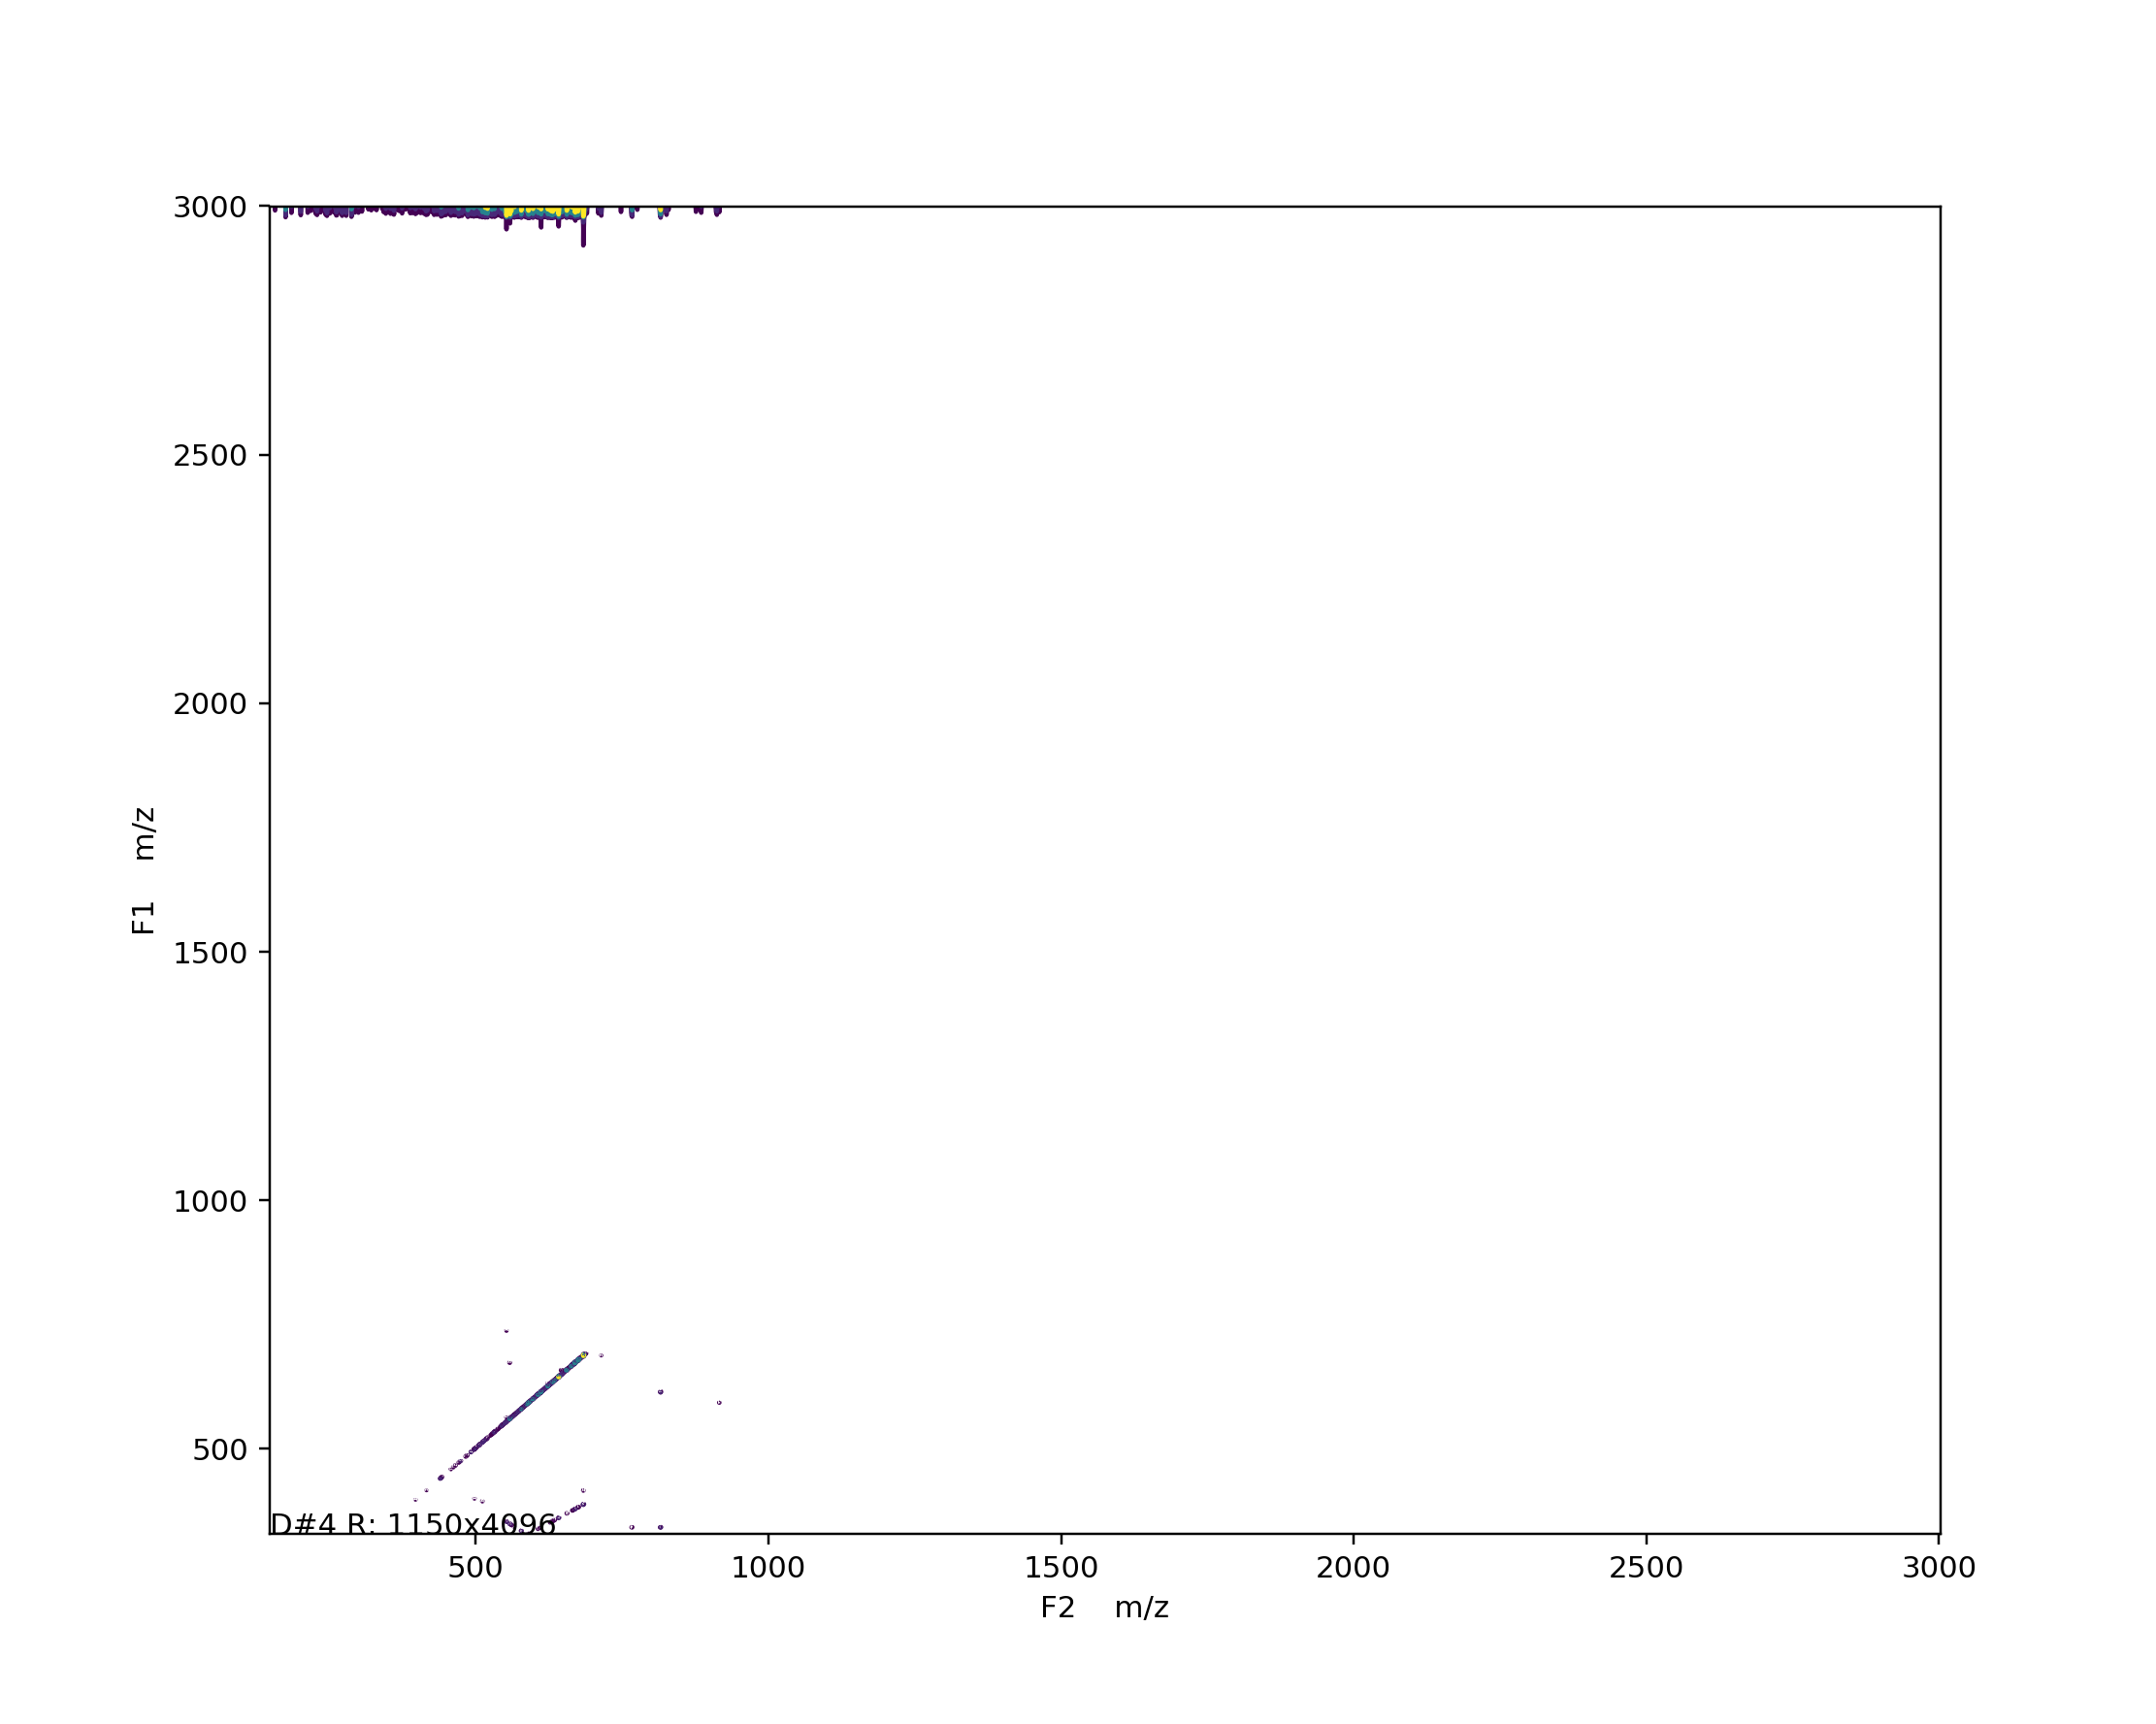

In [16]:
MR_interact(FC.file);

- 🔍 in  : zoom win
- 🔍out : zoom out
- ◀︎ : moves the zoom window left
- ▶︎ : moves the zoom window right
- ▲ : moves the zoom window up
- ▼ : moves the zoom window down
- ⍇ : back in zoom list
- ⍈ : forward in zoom list
- you can also directly enter the zoom coordinates, the click on Update
- × : lower the levels used for the display
- ÷ : raise the levels used for the display
- ≡ : reset default levels
- ⌘ : reset to initial view

Note that the 2D files contain several version of the spectrum at different resolution - zooming and out may modify the look of the region you are looking to.
Only the closest zoom contains the unbiaised verion of the spectrum.

Some additional options are possible:

- store the view into a python variable (we'll see other usage below)
- store the created view into a python variable
- define behaviour at start-up
- overload the initial view

<IPython.core.display.Javascript object>


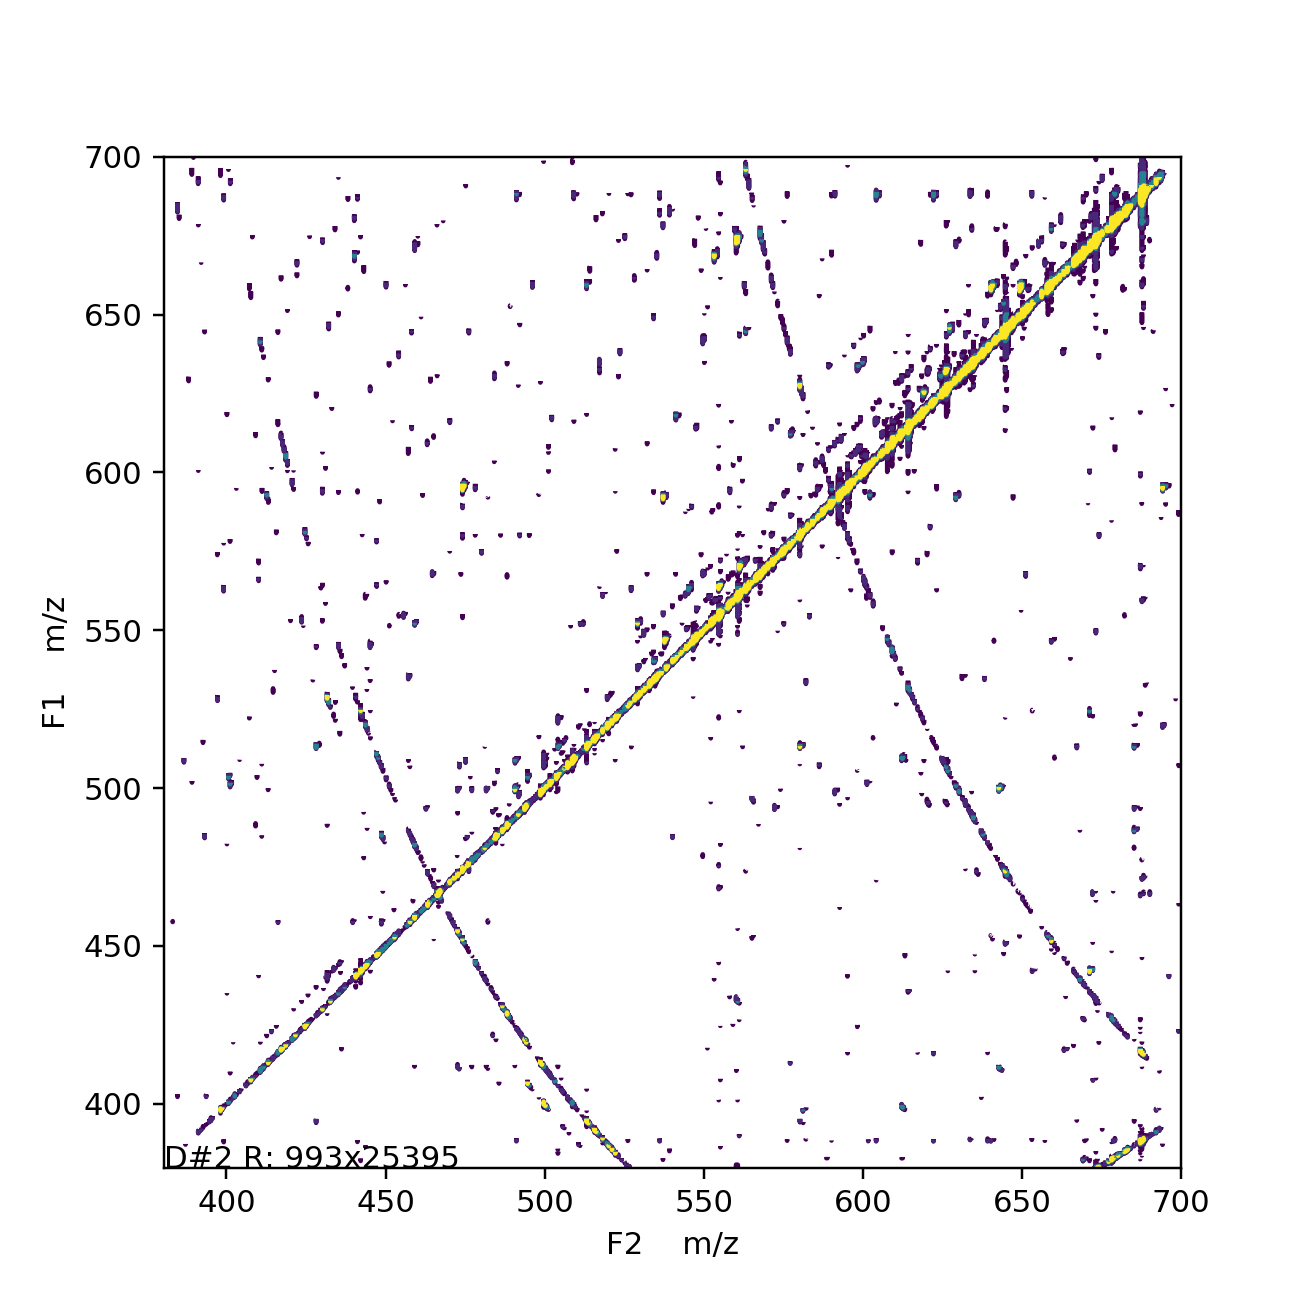

In [19]:
# complete initialisation, and storing the view into a python var
DI = MR_interact(FC.file,
                report=False,   # inhibits parameter printing
                show=False,     # does not display on start-up
                figsize=(15,15),# Size of initial display (in cm)
                Debug=False     # Enables live debugging if True
               )
DI._zoom = (380, 700, 380, 700)     # set the initial zoom view, in m/z (F1low , F1High , F2low , F2High)
DI.scale = 3.0                      # set the initial scale
DI.show()                           # and finally show

There is 1D extraction tool which is handy to examine carefully the details

Just use your stored view and append `.I1D()` to it

<IPython.core.display.Javascript object>


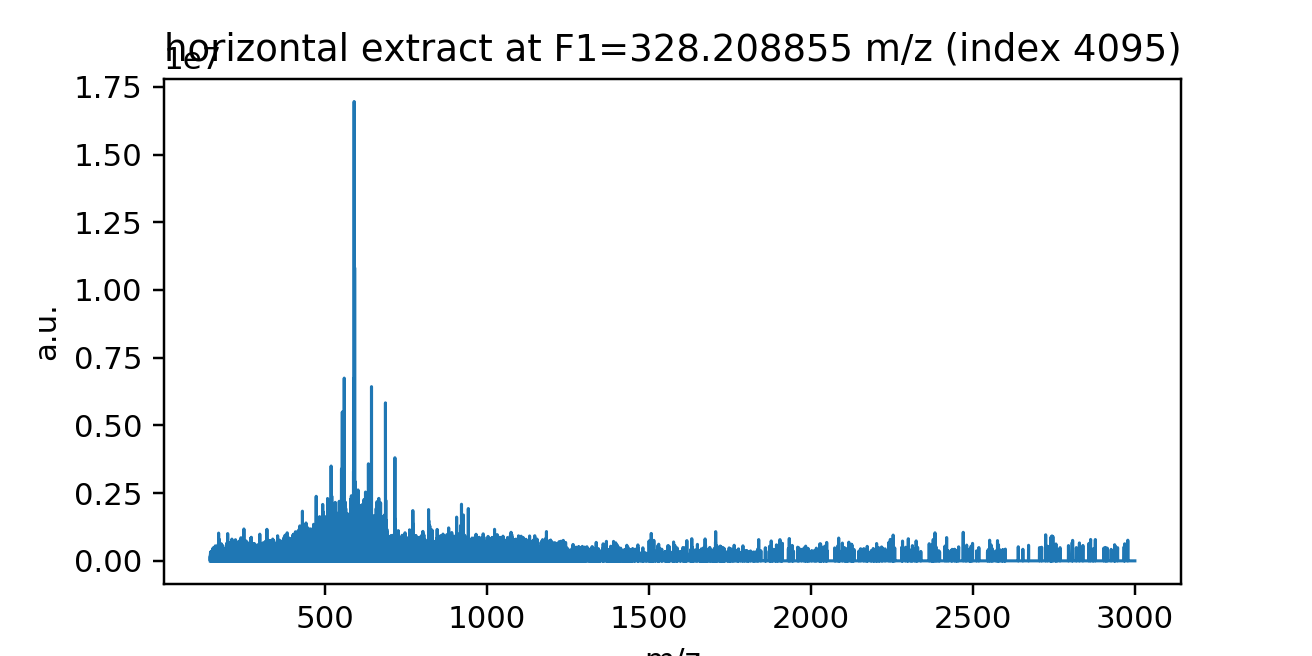

In [18]:
DI.I1D()

### to come
- calibration
- peak detection
- superimposition
- exctaction of arbitrary 1D 
- locate artifacts due to harmonics